<a href="https://colab.research.google.com/github/dogbull/nihhs-v22/blob/main/%EB%82%98%EB%A7%8C%EC%9D%98_%EC%9E%91%EB%AC%BC_%EC%83%9D%EC%9C%A1_%EB%AA%A8%ED%98%95_%EB%A7%8C%EB%93%A4%EA%B8%B02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 나만의 작물 생육 모형 만들기2
* [나만의 작물 생육 모델 만들기1 (1/4)](https://colab.research.google.com/drive/1rCZZD8RO2ujJcg4OW-N_10Dm6Nfh8K6l?hl)
* [**나만의 작물 생육 모형 만들기2 (2/4)**](https://colab.research.google.com/drive/13jqzPAHMVxPNTGmMR1X97ecDQaVIQMXH)
* [나만의 작물 생육 모형 만들기3 (3/4)](https://colab.research.google.com/drive/12ldfgoyE5USxiZ15EbsQRvQDTEnZLp55)
* [나만의 작물 생육 모형 만들기4 (4/4)](https://colab.research.google.com/drive/1epUU1uIVmCjaPA_3KZWP0EoC9dPvyj4x)

---
`나만의 작물 생육 모형 만들기`에서는 [파이썬](https://www.python.org/) 컴퓨터 프로그래밍 언어를 이용하여 작물 생육 모형을 제작하는 실습을 수행합니다. 이 실습은 파이썬 환경설정에 소요되는 시간을 줄이기 위해 개인 컴퓨팅 환경이 아닌 [Google Colab](https://colab.research.google.com/?hl=ko)을 이용하여 진행하도록 합니다.

본 실습에서는 아래와 같은 내용을 다룹니다.

* Python과 Colab에 대해 알아봅니다.
* 기상청종관기상관측자료(KMA ASOS)를 시각화합니다.
* GDD(Growthing Degree Days) 작물 생육 모형을 제작합니다.
* CHD(Chill-Days) 작물 생육 모형을 제작합니다.
* 격자형 자료를 생성하고 시각화합니다.



---
안녕하세요. `나만의 작물 생육 모형 만들기` 두 번째 시간입니다.

이번 시간에는 `기상청종관기상관측자료`(KMA ASOS; 이하 ASOS)의 시각화에 대해 알아보겠습니다.

ASOS 자료는 분단위로 관측 또는 시(Hourly), 일(Daily) 등의 단위로 집계되는 `시계열 자료` 이며, 관측 지점의 위치 정보를 포함하고 있는 `지리정보 자료`이기도 합니다. 그러므로 시계열 형식과 지리정보 형식의 표출, 두 가지에 대해 알아보도록 하겠습니다.

## 1. ASOS 자료 가져오기

ASOS 자료는 [기상자료개방포털](https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36)에서 얻을 수 있습니다. 

기상자료개방포털에서 컴퓨터 프로그램을 통해 자료를 가져오기 위해서는 해당 웹 사이트에 제시된 OpenAPI 방식을 이용해야 하고 이때 자료를 요청자를 식별하기 위한 식별자(API key)를 발급핟아야 합니다. 이 식별자는 자료 요청자의 IP 주소와 조합되어 요청자를 제어하는데 사용됩니다. 실습을 진행함에 있어 기상자료개방포털의 OpenAPI를 이용하기 어려운 점 두 가지는 OpenAPI 발급에 소요되는 시간과 해당 OpenAPI가 제공하는 기능 부족입니다.

그러므로 실습의 편의를 위해 주식회사 에피넷에서 관리하는 [pykawos](https://github.com/dogbull/pykawos)를 이용하도록 하겠습니다.

In [1]:
# 기상청 자료를 가져오기 위한 패키지 설치

! pip install -q pykawos

In [2]:
# pykawos 패키지 불러오기

import pykawos

## A. 기상 관측 지점 목록

전국에는 100여 개의 ASOS 지점 있습니다. 우선 이 지점의 목록을 가져와 보겠습니다.

In [3]:
# 종관기상관측(ASOS)지점 목록 가져오기

df = pykawos.read_asos_stations()

In [4]:
# 가져온 종관기상관측(ASOS)지점 목록 보기

df

,code,begin,until,name,address,parent,lat,lon,elevation,barometer_height,tempmeter_height,windmeter_height,rainmeter_height,geometry
0,90,1968-01-01,NaN,속초,강원도 고성군토성면 봉포5길9 속초자동기상관측소,속초기상대(90),38.2509,128.5647,17.53,18.73,1.7,10.0,1.4,POINT (128.56470 38.25090)
1,93,2016-10-01,NaN,북춘천,강원도 춘천시신북읍 산천리264(장본1길 12) 춘천기상대,춘천기상대(101),37.9474,127.7544,95.78,96.78,1.5,10.0,1.4,POINT (127.75440 37.94740)
2,95,1988-01-01,NaN,철원,강원도 철원군갈말읍 명성로179번길 26 철원자동기상관측소,춘천기상대(101),38.1479,127.3042,155.48,156.98,1.8,13.0,1.5,POINT (127.30420 38.14790)
3,98,1998-02-01,NaN,동두천,경기도 동두천시방죽로 16-47동두천서비스센터,수도권기상청(119),37.9019,127.0607,115.62,116.74,1.7,10.0,1.0,POINT (127.06070 37.90190)
4,99,2013-10-22,NaN,파주,경기도 파주시문산읍 마정로46-29(파주기상대),수도권기상청(119),37.8859,126.7665,30.59,31.99,1.7,10.0,1.0,POINT (126.76650 37.88590)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,285,1973-01-01,NaN,합천,경상남도 합천군합천읍 동서로164번 합천자동기상관측소,울산기상대(152),35.5651,128.1699,26.72,33.20,1.5,10.0,0.5,POINT (128.16990 35.56510)
136,288,1973-01-01,NaN,밀양,경상남도 밀양시점필재로 5밀양자동기상관측소,울산기상대(152),35.4915,128.7441,8.31,12.50,2.0,10.0,1.3,POINT (128.74410 35.49150)
137,289,1972-03-30,NaN,산청,경상남도 산청군 산청읍 꽃봉산로133번길 3산청자동기상관측소,창원기상대(155),35.4130,127.8791,138.22,138.80,1.6,10.0,0.6,POINT (127.87910 35.41300)
138,294,1972-01-24,NaN,거제,경상남도 거제시 장평2로2길 47거제자동기상관측소(장평동),부산지방기상청(159),34.8882,128.6046,44.83,46.70,1.7,10.0,0.6,POINT (128.60460 34.88820)


각 행(row)는 ASOS 지점을 나타냅니다. 2022년 08월 기준으로 140개의 행이 출력된 것을 볼 수 있습니다. 그런데 이 각각의 행이 ASOS 지점과 1대 1로 대응하는 것은 아닙니다. 관측지점의 위치가 변경되면 또 다른 행이 추가되고 관측시작시각(`begin`)과 관측종료시각(`until`)이 변경됩니다.

예를들어 `남원(247)` 지점만 선택해 보도록 하겠습니다.

In [5]:
# code가 247인 지점만 선택해 보겠습니다.

df[df['code'] == 247]

,code,begin,until,name,address,parent,lat,lon,elevation,barometer_height,tempmeter_height,windmeter_height,rainmeter_height,geometry
92,247,2017-08-25,NaN,남원,전라북도 남원시춘향로 74-32남원지역기상서비스센터,전주기상대(146),35.4213,127.3965,133.49,91.8,1.7,10.0,0.7,POINT (127.39650 35.42130)
93,247,2013-08-01,2017-08-25,남원,전라북도 남원시춘향로 74-32남원지역기상서비스센터,전주기상대(146),35.4023,127.3967,127.48,91.8,1.7,10.0,0.7,POINT (127.39670 35.40230)
94,247,1972-01-04,2013-08-01,남원,전라북도 남원시춘향로 74-32남원지역기상서비스센터,남원기상대(247),35.4054,127.3330,90.29,94.7,1.8,10.0,0.6,POINT (127.33300 35.40540)


In [6]:
# code가 108인 지점만 선택해 보겠습니다.
# 위치(lon,lat)가 변경되지 않았지만, 다른 요소(elevation 등)가 변경된 경우에도 새로운 행이 생성됩니다.

df[df['code'] == 108]

,code,begin,until,name,address,parent,lat,lon,elevation,barometer_height,tempmeter_height,windmeter_height,rainmeter_height,geometry
14,108,2010-08-16,NaN,서울,서울특별시 종로구송월길 52서울기상관측소,서울기상관측소(108),37.5714,126.9658,85.67,86.67,1.5,10.0,0.5,POINT (126.96580 37.57140)
15,108,1907-10-01,2010-08-15,서울,서울특별시 종로구송월길 52서울기상관측소,서울기상관측소(108),37.5714,126.9658,85.50,86.50,1.5,10.0,0.6,POINT (126.96580 37.57140)


---
그렇다면 어떻게 현재 운영되고 있는 ASOS 지점만 선택할 수 있을까요?

관측종료일(`until`) 값이 `null`이면 즉, 관측종료일이 설정되어 있지 않다면 현재 운영되고 있는 지점으로 생각할 수 있습니다.

In [7]:
# 관측종료일(until)이 null인 행만 필터링 합니다(즉 현재운용중인 관측지점만 선택).

currently_asos = df[df['until'].isnull()]

currently_asos

,code,begin,until,name,address,parent,lat,lon,elevation,barometer_height,tempmeter_height,windmeter_height,rainmeter_height,geometry
0,90,1968-01-01,NaN,속초,강원도 고성군토성면 봉포5길9 속초자동기상관측소,속초기상대(90),38.2509,128.5647,17.53,18.73,1.7,10.0,1.4,POINT (128.56470 38.25090)
1,93,2016-10-01,NaN,북춘천,강원도 춘천시신북읍 산천리264(장본1길 12) 춘천기상대,춘천기상대(101),37.9474,127.7544,95.78,96.78,1.5,10.0,1.4,POINT (127.75440 37.94740)
2,95,1988-01-01,NaN,철원,강원도 철원군갈말읍 명성로179번길 26 철원자동기상관측소,춘천기상대(101),38.1479,127.3042,155.48,156.98,1.8,13.0,1.5,POINT (127.30420 38.14790)
3,98,1998-02-01,NaN,동두천,경기도 동두천시방죽로 16-47동두천서비스센터,수도권기상청(119),37.9019,127.0607,115.62,116.74,1.7,10.0,1.0,POINT (127.06070 37.90190)
4,99,2013-10-22,NaN,파주,경기도 파주시문산읍 마정로46-29(파주기상대),수도권기상청(119),37.8859,126.7665,30.59,31.99,1.7,10.0,1.0,POINT (126.76650 37.88590)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,285,1973-01-01,NaN,합천,경상남도 합천군합천읍 동서로164번 합천자동기상관측소,울산기상대(152),35.5651,128.1699,26.72,33.20,1.5,10.0,0.5,POINT (128.16990 35.56510)
136,288,1973-01-01,NaN,밀양,경상남도 밀양시점필재로 5밀양자동기상관측소,울산기상대(152),35.4915,128.7441,8.31,12.50,2.0,10.0,1.3,POINT (128.74410 35.49150)
137,289,1972-03-30,NaN,산청,경상남도 산청군 산청읍 꽃봉산로133번길 3산청자동기상관측소,창원기상대(155),35.4130,127.8791,138.22,138.80,1.6,10.0,0.6,POINT (127.87910 35.41300)
138,294,1972-01-24,NaN,거제,경상남도 거제시 장평2로2길 47거제자동기상관측소(장평동),부산지방기상청(159),34.8882,128.6046,44.83,46.70,1.7,10.0,0.6,POINT (128.60460 34.88820)


위 코드를 실행해본 결과 2022년 08월 기준으로 모두 `95`개의 ASOS 관측 지점이 운영 중인 것으로 확인됩니다.

In [8]:
# 참고로 두 번 이상의 변경 이력이 있는 관측지점만 선택해 보겠습니다.

df['code'].value_counts()[lambda x: x >= 2]

152    3
247    3
155    3
251    3
143    2
271    2
188    2
136    2
266    2
140    2
146    2
256    2
232    2
262    2
177    2
165    2
259    2
258    2
189    2
130    2
273    2
284    2
99     2
100    2
239    2
102    2
276    2
255    2
108    2
112    2
245    2
119    2
192    2
Name: code, dtype: int64

---
ASOS 지점의 공간적 분포를 확인해 보도록 하겠습니다. 이를 간단하게 수행하기 위해 `hist` 함수를 사용해 보겠습니다.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a6acc9f10>]],
      dtype=object)

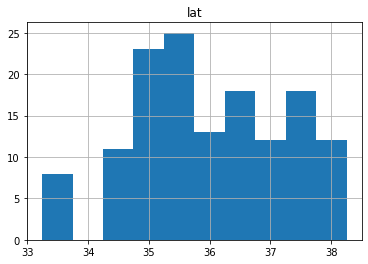

In [9]:
# ASOS 관측 지점을 위도상에서의 공간적 분포를 시각화해 봅니다.

df.hist('lat')

위도(lat; latitude) 34 인근에서 빈공간이 나타나는 것은 한반도와 제주도 사이의 바다 때문일 것으로 추측됩니다.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a6e8213d0>]],
      dtype=object)

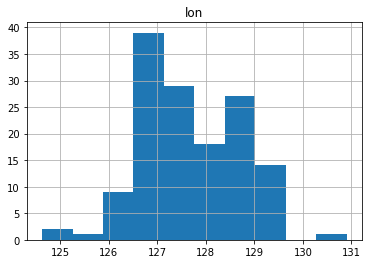

In [10]:
# ASOS 관측 지점을 경도상에서의 공간적 분포를 시각화해 봅니다.

df.hist('lon')

경도(lon, longitude) 상에서의 양 끝은 서해와 동해이므로, 양 끝 방향으로 갈 수록 ASOS 지점 수가 줄어드는 것을 볼 수 있습니다.

---
이번에는 사용자와 상호작용할 수 있는 WebGIS 지도를 이용하여 ASOS 지점을 시각화해 보도록하겠습니다. `folium`, `ipyleaflet`, `plotly` 등 다양한 도구 중 `colab`에 기본적으로 설치되어 있는 `folium`을 이용하도록 하겠습니다.

In [11]:
import folium

In [12]:
# 지도 중심점의 좌표가 경위도(lon,lat; x,y)가 아닌 위경도(lat,lon; y,x)임에 주의하세요.
# 대한민국 전체를 볼 수 있도록 zoom_start 값을 7로 하였습니다(값이 클수록 확대됨).
# 아무거도 없는 빈 지도를 출력해 보겠습니다.

map = folium.Map(location=[37, 127], zoom_start=7)

map

지도 위에 종관기상 관측지점을 마킹해 보도록 하겠습니다.

In [13]:
map = folium.Map(location=[37, 127], zoom_start=7)

for i, x in currently_asos.iterrows():
    lon = x['lon']
    lat = x['lat']
    name = x['name']
    code = x['code']
    location = [lat, lon]
    tooltip1 = f'{name}({code})'

    folium.Marker(
        location=location, 
        tooltip=tooltip1,
    ).add_to(map)

map

ASOS 관측지점을 중심으로 반경 30,000미터(30km)의 원을 그려 보도록하겠습니다. 그려진 원이 많이 겹쳐지는 지역일 수록 30km 내 인근에 관측지점이 많다는 의미이고, 원이 그려지지 않은 지역은 30km 내에 관측지점이 없다는 의미로 해설할 수 있습니다.

In [14]:
# currently_asos는 pandas DataFrame 형식의 자료이므로 매 행 마다 반복을 수행하기 위해 iterrows 함수를 이용합니다.
# folium.Circle 를 이용하여 원을 그리고, radius 에 30000을 할당하여 반지름이 30km가 되도록 합니다.

map = folium.Map(location=[37, 127], zoom_start=7)

for i, x in currently_asos.iterrows():
    lon = x['lon']
    lat = x['lat']
    name = x['name']
    code = x['code']
    location = [lat, lon]
    tooltip1 = f'{name}({code})'

    folium.Circle(
        location=location,
        radius=30000,
        color='#000000',
        fill_color='#FF0000',
    ).add_to(map)

    folium.Marker(
        location=location, 
        tooltip=tooltip1,
    ).add_to(map)

map

In [15]:
# 공간적인 밀도를 시각화할 경우, 때로는 `heatmap`라는 방법이 유용할 수 있습니다.

from folium.plugins import HeatMap

map = folium.Map(location=[37, 127], zoom_start=6)

coords = currently_asos[['lat', 'lon']]

HeatMap(
    coords,
    radius=20,
).add_to(map)

map

`적색` 부분은 관측기의 밀도가 높다는 뜻으로, `녹색` 부분은 그 반대로 해석할 수 있습니다.


## B. ASOS 관측 자료 가져오기

이제 ASOS 관측 자료를 다루어 보도록 하겠습니다. 기상청 관측 자료는 앞서 밝힌 뱌와 같이 `pykawos`를 이용하도록 하겠습니다.

In [16]:
# 서귀포(189) 지점의 2021년 자료를 가져옵니다.

df189 = pykawos.read_asos_single_point(189, '20210101', '20211231')

df189

,index,dt,avg_ta,min_ta,max_ta,max_ta_hrmt,min_ta_hrmt,sum_rn,hr1_max_rn,mi10_max_rn,...,min_ps_hrmt,max_ps_hrmt,sum_fog_dur,sum_lrg_ev,sum_sml_ev,iscs,code,x,y,geometry
0,0,2021-01-01,4.7,2.3,6.3,1037.0,856.0,NaN,NaN,NaN,...,1737.0,950.0,NaN,NaN,NaN,NaN,189,126.5653,33.2462,POINT (126.56530 33.24620)
1,1,2021-01-02,6.5,3.7,10.2,1320.0,2230.0,NaN,NaN,NaN,...,1434.0,2400.0,NaN,NaN,NaN,NaN,189,126.5653,33.2462,POINT (126.56530 33.24620)
2,2,2021-01-03,6.3,3.8,9.1,1408.0,638.0,NaN,NaN,NaN,...,1622.0,1023.0,NaN,NaN,NaN,{달무리}0240-0520.,189,126.5653,33.2462,POINT (126.56530 33.24620)
3,3,2021-01-04,6.5,3.2,10.8,1435.0,715.0,NaN,NaN,NaN,...,1558.0,302.0,NaN,NaN,NaN,NaN,189,126.5653,33.2462,POINT (126.56530 33.24620)
4,4,2021-01-05,7.2,4.3,10.3,1622.0,2343.0,NaN,NaN,NaN,...,1520.0,142.0,NaN,NaN,NaN,NaN,189,126.5653,33.2462,POINT (126.56530 33.24620)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,360,2021-12-27,3.7,-0.4,7.5,1414.0,244.0,0.0,NaN,NaN,...,1434.0,1036.0,NaN,NaN,NaN,-{소낙눈}-0007.,189,126.5653,33.2462,POINT (126.56530 33.24620)
361,361,2021-12-28,7.0,3.5,11.0,1306.0,239.0,NaN,NaN,NaN,...,2349.0,34.0,NaN,NaN,NaN,NaN,189,126.5653,33.2462,POINT (126.56530 33.24620)
362,362,2021-12-29,9.0,6.9,12.0,1324.0,2358.0,0.1,NaN,NaN,...,1317.0,1.0,NaN,NaN,NaN,{비}0640-0837. {연무}2250-2358.,189,126.5653,33.2462,POINT (126.56530 33.24620)
363,363,2021-12-30,6.5,4.6,9.1,1023.0,736.0,0.0,NaN,NaN,...,315.0,2312.0,NaN,NaN,NaN,{비}2055-{비}{강도0}2100-2120. {비}2305-{비}{강도0}2400-,189,126.5653,33.2462,POINT (126.56530 33.24620)


예상대로 365개의 래코드(행)이 반환된 것을 볼 수 있습니다. 이 자료의 `최고`. `최저`, `평균` 기온을 시계열 차트로 시각화해 보겠습니다.

In [17]:
import matplotlib.pylab as plt

# figure 크기를 변경하겠습니다.
plt.rcParams['figure.figsize'] = [20, 4]

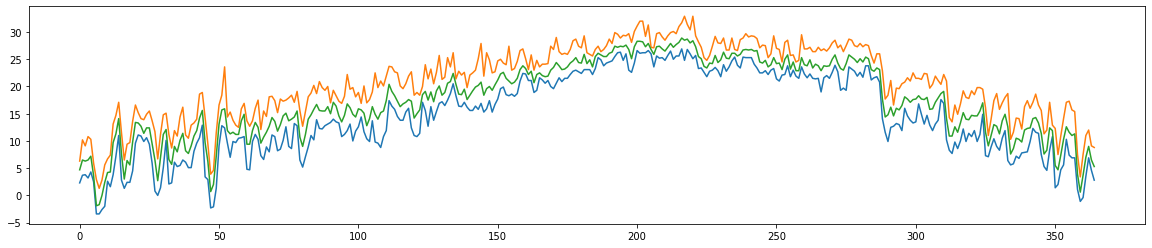

In [18]:
# 서귀포(189) 시각화

plt.plot(df189['min_ta'])
plt.plot(df189['max_ta'])
plt.plot(df189['avg_ta'])

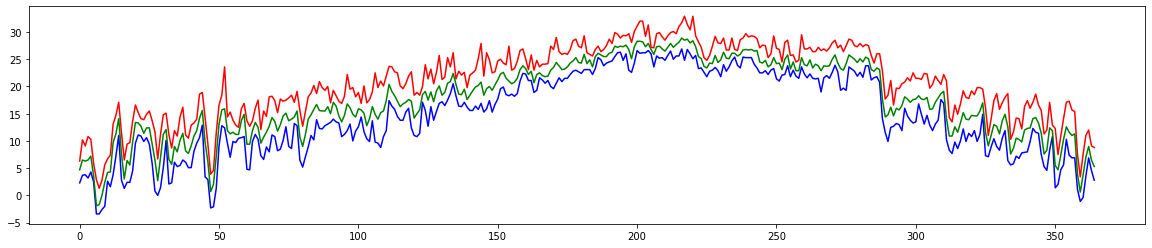

In [19]:
# 서귀포(189) 시각화
# 시인성을 높이기 위해 라인의 색상을 변경하겠습니다.

plt.plot(df189['min_ta'], 'b') # 최저기온은 청색
plt.plot(df189['max_ta'], 'r') # 최고기온은 적색
plt.plot(df189['avg_ta'], 'g') # 평균기온은 녹색


`서귀포(189)`와 `제주(184)`의 값을 비교해 보도록 하겠습니다.

In [20]:
# 제주(184) 지점의 2021년 자료를 가져옵니다.

df184 = pykawos.read_asos_single_point(184, '20210101', '20211231')

df184

,index,dt,avg_ta,min_ta,max_ta,max_ta_hrmt,min_ta_hrmt,sum_rn,hr1_max_rn,mi10_max_rn,...,min_ps_hrmt,max_ps_hrmt,sum_fog_dur,sum_lrg_ev,sum_sml_ev,iscs,code,x,y,geometry
0,0,2021-01-01,5.5,4.0,7.2,2358.0,235.0,0.0,NaN,NaN,...,2244.0,954.0,NaN,1.6,2.3,{소낙눈}0021-0029. {소낙성진눈깨비}0512-{소낙성진눈깨비}{강도0}06...,184,126.5297,33.5141,POINT (126.52970 33.51410)
1,1,2021-01-02,5.9,2.8,8.4,1035.0,2316.0,0.0,NaN,NaN,...,10.0,2400.0,NaN,1.4,2.1,{비}0943-0953. {비}1201-1211.,184,126.5297,33.5141,POINT (126.52970 33.51410)
2,2,2021-01-03,4.5,2.7,6.3,1206.0,27.0,NaN,NaN,NaN,...,1552.0,1029.0,NaN,1.3,1.8,NaN,184,126.5297,33.5141,POINT (126.52970 33.51410)
3,3,2021-01-04,5.9,2.2,9.2,1307.0,712.0,NaN,NaN,NaN,...,1600.0,303.0,NaN,1.5,2.2,NaN,184,126.5297,33.5141,POINT (126.52970 33.51410)
4,4,2021-01-05,5.6,2.6,9.0,415.0,2046.0,0.0,NaN,NaN,...,628.0,2028.0,NaN,1.2,1.7,{비}0525-{비}{강도0}0600-{비}{강도0}0900-0905.,184,126.5297,33.5141,POINT (126.52970 33.51410)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,360,2021-12-27,4.1,0.8,6.5,2255.0,104.0,0.1,NaN,NaN,...,1418.0,1026.0,NaN,1.0,1.4,{눈}0308-0538.,184,126.5297,33.5141,POINT (126.52970 33.51410)
361,361,2021-12-28,7.2,5.9,8.4,1459.0,625.0,NaN,NaN,NaN,...,2331.0,1.0,NaN,0.9,1.3,NaN,184,126.5297,33.5141,POINT (126.52970 33.51410)
362,362,2021-12-29,9.3,6.6,11.5,1121.0,231.0,0.4,NaN,NaN,...,1427.0,1.0,NaN,2.3,3.3,{비}0551-{비}{강도0}0600-0743.,184,126.5297,33.5141,POINT (126.52970 33.51410)
363,363,2021-12-30,6.9,5.8,8.4,1.0,836.0,NaN,NaN,NaN,...,9.0,2358.0,NaN,2.3,3.2,NaN,184,126.5297,33.5141,POINT (126.52970 33.51410)


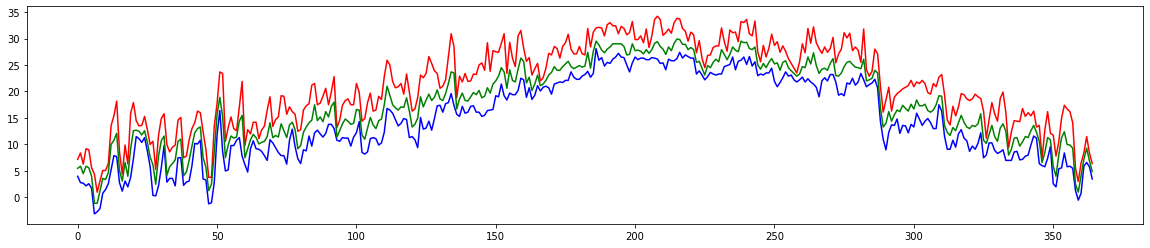

In [21]:
# 제주(184) 시각화

plt.plot(df184['min_ta'], 'b') # 최저기온은 청색
plt.plot(df184['max_ta'], 'r') # 최고기온은 적색
plt.plot(df184['avg_ta'], 'g') # 평균기온은 녹색

제주(184)와 서귀포(189)의 기온이 얼마나 차이 나는지 알아보기 위해 일별 시계열 그래프를 그려보겠습니다.

단순히 제주(184)에서 서귀포(189)를 뺀 값을 그래프로 그려봅니다.

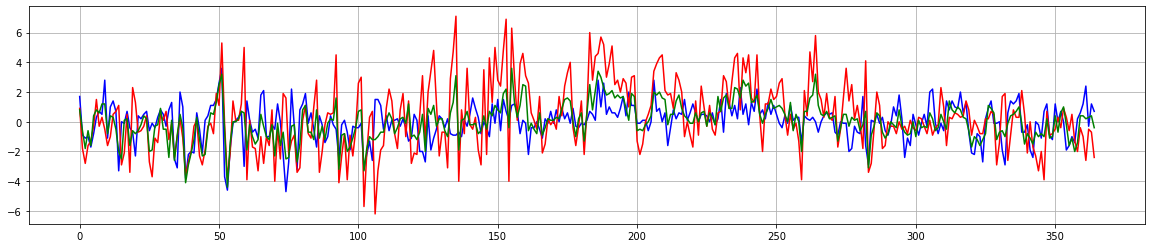

In [22]:
diff_tmin = df184['min_ta'] - df189['min_ta']
diff_tmax = df184['max_ta'] - df189['max_ta']
diff_tavg = df184['avg_ta'] - df189['avg_ta']

plt.plot(diff_tmin, 'b') # 최저기온은 청색
plt.plot(diff_tmax, 'r') # 최고기온은 적색
plt.plot(diff_tavg, 'g') # 평균기온은 녹색

plt.grid() # 배경선을 렌더링하여 시인성을 높입니다.

평균기온이나 최저기온보다 상대적으로 최고기온의 차이가 더 크게 차이 나는 것으로 보입니다(적색 선의 진폭이 상대적으로 큼).

그렇다면 `서귀포(189)`와 `제주(184)`의 2021년 최고기온이 평균적으로 얼마나 차이나는지 계산하고 시각화해 보도록 하겠습니다.

RMS=2.2856311139466703, MA=1.7616438356164383, MAX=7.100000000000001


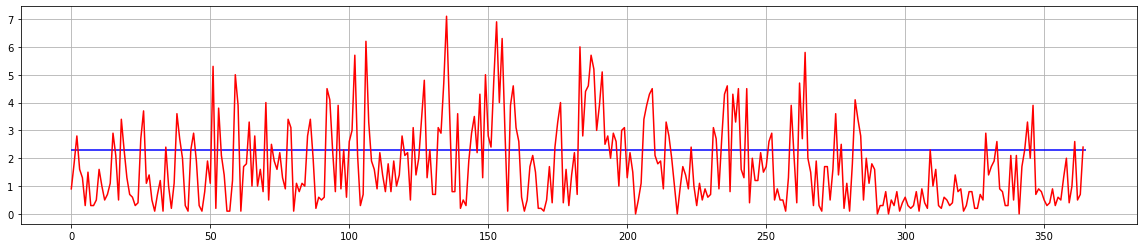

In [23]:
# 최고기온 차이의 절대값을 계산합니다.
diff_tmax_abs = diff_tmax.abs()

# 최고기온 차이의 절대값을 렌더링합니다.
plt.plot(diff_tmax_abs, 'r')

# 서귀포(189)와 제주(184)의 평균적 차이를 위해 RMS를 계산합니다.
rms = (diff_tmax ** 2).mean() ** 0.5

# RMS 값을 렌더링합니다.
# 2021년의 일별 자료이므로 len(diff_tmax) == 365입니다.
plt.hlines(rms, xmin=0, xmax=len(diff_tmax), color='b') 

plt.grid()

print(f'RMS={rms}, MA={diff_tmax_abs.mean()}, MAX={diff_tmax_abs.max()}')

`RSE`는 2.28, `MA`는 1.76으로 계산되었습니다. 최대 7.1도까지 차이가 나는 날짜도 있는 것을 볼 수 있습니다.

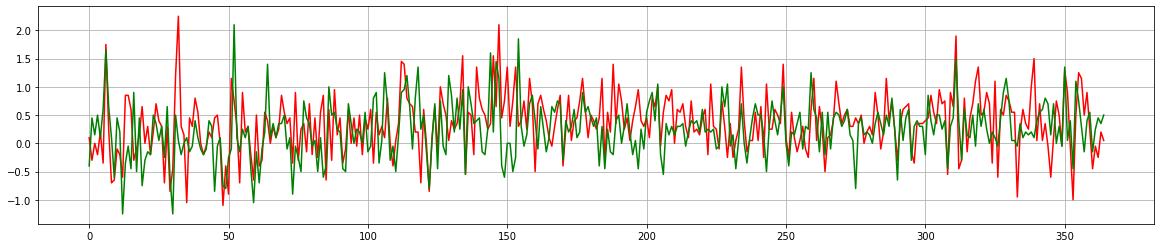

In [24]:
# 평균기온이 존재하지 않는 경우 최고기온과 최고기온의 중앙값을 평균기온으로 대체하고는 합니다.
# 2021년도 서귀포(189)과 제주(184) 지점을 이용하여 이 방법이 어느 정도의 오차를 가지고 있는지 확인해 보도록 하겠습니다.


dx184 = ((df184['min_ta'] + df184['max_ta']) / 2) - df184['avg_ta']
dx189 = ((df189['min_ta'] + df189['max_ta']) / 2) - df189['avg_ta']

plt.plot(dx184, 'r')
plt.plot(dx189, 'g')

plt.grid()

위 차트를 보니 양수 값이 음수 값보다 대체적으로 많은 것 같습니다. `중간값 - 평균값`의 결과이니 `중간값`이 `평균값` 보다 대체적으로 크다고 볼 수 있겠습니다. 그리고 그 값은 아래와 같습니다.

In [25]:
dxm184 = dx184.mean() # 제주(184)의   중간값-평균값의 전 기간(2021 daily) 평균
dxm189 = dx189.mean() # 서귀포(189)의 중간값-평균값의 전 기간(2021 daily) 평균

print(f'제주(184)의   중간값-평균값의 전 기간(2021 daily) 평균은 {dxm184}입니다.')
print(f'서귀포(189)의 중간값-평균값의 전 기간(2021 daily) 평균은 {dxm189}입니다.')

제주(184)의   중간값-평균값의 전 기간(2021 daily) 평균은 0.35178082191780824입니다.
서귀포(189)의 중간값-평균값의 전 기간(2021 daily) 평균은 0.23876712328767125입니다.


In [26]:
def calc_rms(numpy_array):
    return (numpy_array ** 2).mean() ** 0.5

print(f'제주(184)의   중간값-평균값의 전 기간(2021 daily) RMS는 {calc_rms(dx184)}입니다.')
print(f'서귀포(189)의 중간값-평균값의 전 기간(2021 daily) RMS는 {calc_rms(dx189)}입니다.')

제주(184)의   중간값-평균값의 전 기간(2021 daily) RMS는 0.628915134636894입니다.
서귀포(189)의 중간값-평균값의 전 기간(2021 daily) RMS는 0.5372877089528298입니다.


마지막으로 특정 시점(일별)의 모든 ASOS 지점의 자료를 가져오고 이를 시각화하도록 하겠습니다.

In [27]:
# 2021년01월01일의 자료를 가져옵니다.

df = pykawos.read_asos_multi_point('20210101')

df

,dt,avg_ta,min_ta,max_ta,max_ta_hrmt,min_ta_hrmt,sum_rn,hr1_max_rn,mi10_max_rn,sum_rn_dur,...,min_ps_hrmt,max_ps_hrmt,sum_fog_dur,sum_lrg_ev,sum_sml_ev,iscs,code,x,y,geometry
0,2021-01-01,-2.9,-7.7,1.2,1456.0,441.0,NaN,NaN,NaN,NaN,...,1416.0,257.0,NaN,NaN,NaN,NaN,90,128.5647,38.2509,POINT (128.56470 38.25090)
1,2021-01-01,-6.8,-15.3,0.4,1453.0,810.0,NaN,NaN,NaN,NaN,...,1445.0,855.0,NaN,1.2,1.7,NaN,93,127.7544,37.9474,POINT (127.75440 37.94740)
2,2021-01-01,-7.8,-15.9,-1.0,1507.0,750.0,NaN,NaN,NaN,NaN,...,1353.0,304.0,NaN,0.9,1.3,NaN,95,127.3042,38.1479,POINT (127.30420 38.14790)
3,2021-01-01,-6.3,-13.8,0.8,1417.0,720.0,NaN,NaN,NaN,NaN,...,1343.0,241.0,NaN,NaN,NaN,NaN,98,127.0607,37.9019,POINT (127.06070 37.90190)
4,2021-01-01,-7.4,-14.9,0.2,1503.0,646.0,NaN,NaN,NaN,NaN,...,1417.0,238.0,NaN,NaN,NaN,NaN,99,126.7665,37.8859,POINT (126.76650 37.88590)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,2021-01-01,-0.3,-4.7,5.0,1545.0,533.0,NaN,NaN,NaN,NaN,...,2350.0,1028.0,NaN,1.0,1.5,NaN,258,127.2123,34.7634,POINT (127.21230 34.76340)
91,2021-01-01,-2.8,-8.7,4.3,1417.0,758.0,NaN,NaN,NaN,NaN,...,1705.0,838.0,NaN,NaN,NaN,NaN,288,128.7441,35.4915,POINT (128.74410 35.49150)
92,2021-01-01,-1.4,-6.9,4.0,1424.0,721.0,NaN,NaN,NaN,NaN,...,1504.0,910.0,NaN,NaN,NaN,NaN,289,127.8791,35.4130,POINT (127.87910 35.41300)
93,2021-01-01,0.7,-4.3,4.4,1402.0,746.0,NaN,NaN,NaN,NaN,...,1733.0,924.0,NaN,NaN,NaN,NaN,294,128.6046,34.8882,POINT (128.60460 34.88820)


In [28]:
# 가져온 자료를 지도위에 시각화합니다.
# vcol에 'tmin_ta' 값을 할당하여 최저기온 값을 표출합니다.

vcol = 'min_ta'

map = folium.Map(location=[37, 127], zoom_start=7)

for i, x in df.iterrows():
    lon = x['x']
    lat = x['y']
    code = x['code']
    value = x[vcol]
    location = [lat, lon]
    tooltip1 = f'{code}: {value}'

    folium.CircleMarker(
        location=location, 
        tooltip=tooltip1,
    ).add_to(map)

map

마커 위에 마우스를 올리면 지점코드와 지점값이 표출됩니다. 값의 크기에 따라 색상을 달리하여 시인선을 높여보도록 하겠습니다.

In [29]:
# 마커에 색을 입혀 시인성을 높이도록 하겠습니다.

from matplotlib.colors import Normalize

vcol = 'min_ta'
vmin = df[vcol].min()
vmax = df[vcol].max()
norm = Normalize(vmin, vmax, clip=True)
cmap = plt.get_cmap('jet')

map = folium.Map(location=[37, 127], zoom_start=7)

for i, x in df.iterrows():
    lon = x['x']
    lat = x['y']
    code = x['code']
    value = x[vcol]
    location = [lat, lon]
    tooltip1 = f'{code}: {value}'

    r, g, b, a = cmap(norm(value), bytes=True)

    folium.CircleMarker(
        location=location, 
        tooltip=tooltip1,
        radius=8,
        #stroke=False,
        color='#000000',
        width=1,
        fill_color=f'rgba({r}, {g}, {b}, {a})',
        fill_opacity=1,
    ).add_to(map)

map

이상으로 첫 번째 `기상청종관기상관측자료(KMA ASOS) 시각화`에 대해 알아보는 실습을 마치도록하겠습니다.

감사합니다.